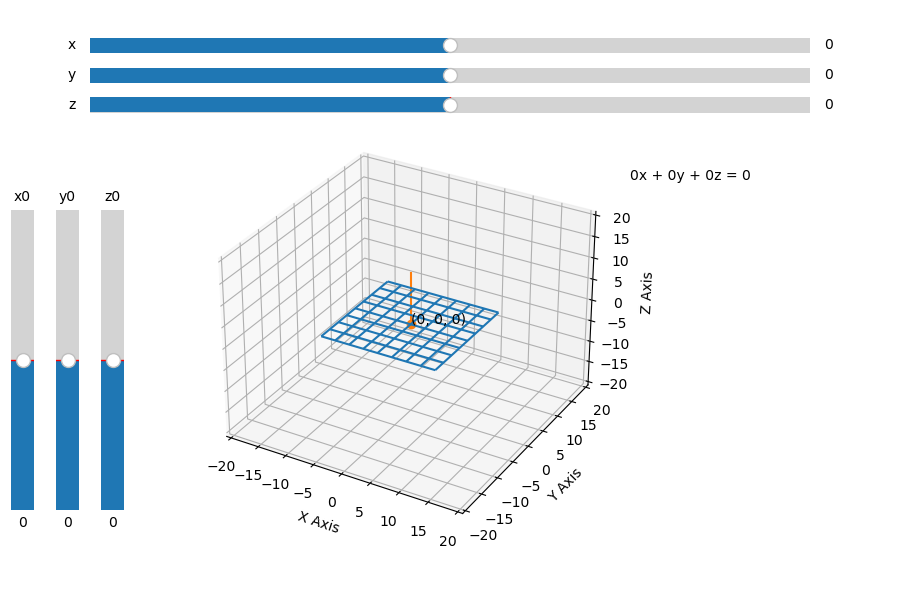

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.widgets import TextBox

plt.close()
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_axes([0, 0.1, 0.9, 0.7], projection = '3d')
ax2 = fig.add_axes([0.1, 0.9, 0.8, 0.05])
ax3 = fig.add_axes([0.1, 0.85, 0.8, 0.05])
ax4 = fig.add_axes([0.1, 0.80, 0.8, 0.05])

ax5 = fig.add_axes([0.0, 0.15, 0.05, 0.5])
ax6 = fig.add_axes([0.05, 0.15, 0.05, 0.5])
ax7 = fig.add_axes([0.1, 0.15, 0.05, 0.5])
ax8 = fig.add_axes([0.7, 0.7, 0.1, 0.1])
# ax8 = fig.add_subplot()

t = np.linspace(0,12,10)
x = np.linspace(-10,10,9)
y = np.linspace(-10,10,9)
z = np.linspace(-10,10,9)

x, y = np.meshgrid(x,y)

n1 = 0
n2 = 0
n3 = 0

x0 = 0
y0 = 0
z0 = 0

if n3 == 0 and n1 != 0:
    y, z = np.meshgrid(y,z)
    
    x = x0 + (- n2*(y-y0) - n3*(z-z0)) / n1
    
elif n3 == 0 and n1 == 0 and n2 != 0:
    x, z = np.meshgrid(x,z)
    
    y = y0 + ( - n1*(x-x0) - n3*(z-z0)) / n2
    
elif n3 == 0 and n1 ==0 and n2 == 0:
    z = x * 0 + y * 0
    
else:
    z = z0 + (- n1*(x-x0) - n2*(y-y0)) / n3

n_mag = np.sqrt(n1**2 + n2**2 + n3**2)
if n_mag != 0:
    x_para = x0 + n1 / n_mag * t
    y_para = y0 + n2 / n_mag * t
    z_para = z0 + n3 / n_mag * t
else:
    x_para = x0 + np.linspace(0,0,10)
    y_para = y0 + np.linspace(0,0,10)
    z_para = z0 + t

ax1.plot(x0,y0,z0,'o',color='tab:orange')
ax1.text(x0,y0,z0, f'{x0,y0,z0}')

ax1.plot(x_para,y_para,z_para,color='tab:orange')
ax1.plot_wireframe(x,y,z, rstride=1, cstride=1)

ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)
ax1.set_zlim(-20, 20)

sx = Slider(ax = ax2, label = 'x', valmin = -10, valmax = 10, valinit = n1)
sy = Slider(ax = ax3, label = 'y', valmin = -10, valmax = 10, valinit = n2)
sz = Slider(ax = ax4, label = 'z', valmin = -10, valmax = 10, valinit = n3)

sx0 = Slider(ax = ax5, label = 'x0', valmin = -10, valmax = 10, valinit = x0, orientation="vertical")
sy0 = Slider(ax = ax6, label = 'y0', valmin = -10, valmax = 10, valinit = y0, orientation="vertical")
sz0 = Slider(ax = ax7, label = 'z0', valmin = -10, valmax = 10, valinit = z0, orientation="vertical")

def update(val):
    ax1.cla()
    ax8.cla()
    ax8.axis("off")
    
    x = np.linspace(-10,10,9)
    y = np.linspace(-10,10,9)
    z = np.linspace(-10,10,9)

    x, y = np.meshgrid(x,y)
    
    n1 = sx.val
    n2 = sy.val
    n3 = sz.val
    
    x0 = sx0.val
    y0 = sy0.val
    z0 = sz0.val
    
    if n3 == 0 and n1 != 0:
        y, z = np.meshgrid(y,z)
    
        x = x0 + (- n2*(y-y0) - n3*(z-z0)) / n1
    
    elif n3 == 0 and n1 == 0 and n2 != 0:
        x, z = np.meshgrid(x,z)
    
        y = y0 + ( - n1*(x-x0) - n3*(z-z0)) / n2
    
    elif n3 == 0 and n1 ==0 and n2 == 0:
        z = x * 0 + y * 0 + z0
        
    else:
        z = z0 + (- n1*(x-x0) - n2*(y-y0)) / n3
    
    n_mag = np.sqrt(n1**2 + n2**2 + n3**2)
    if n_mag != 0:
        x_para = x0 + n1 / n_mag * t
        y_para = y0 + n2 / n_mag * t
        z_para = z0 + n3 / n_mag * t
    else:
        x_para = x0 + np.linspace(0,0,10)
        y_para = y0 + np.linspace(0,0,10)
        z_para = z0 + t

    ax1.plot(x0,y0,z0,'o',color='tab:orange')

    ax1.text(x0 + 0.5,y0 +0.5,z0 +0.5, f'{round(x0,2),round(y0,2),round(z0,2)}')

    ax1.plot(x_para,y_para,z_para,color='tab:orange')
    ax1.plot_wireframe(x,y,z, rstride=1, cstride=1)
    ax8.text(0, 0, f'{round(n1,2)}x + {round(n2,2)}y + {round(n3,2)}z = {round(n1*x0 + n2*y0 + n3*z0,2)}')
    ax1.set_xlim(-20, 20)
    ax1.set_ylim(-20, 20)
    ax1.set_zlim(-20, 20)
    ax1.set_xlabel("X Axis")
    ax1.set_ylabel("Y Axis")
    ax1.set_zlabel("Z Axis")
    
ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_zlabel("Z Axis")

sx.on_changed(update)
sy.on_changed(update)
sz.on_changed(update)

sx0.on_changed(update)
sy0.on_changed(update)
sz0.on_changed(update)

ax8.axis("off")
ax8.text(0, 0, f'{n1}x + {n2}y + {n3}z = {n1*x0 + n2*y0 + n3*z0}')

plt.show()

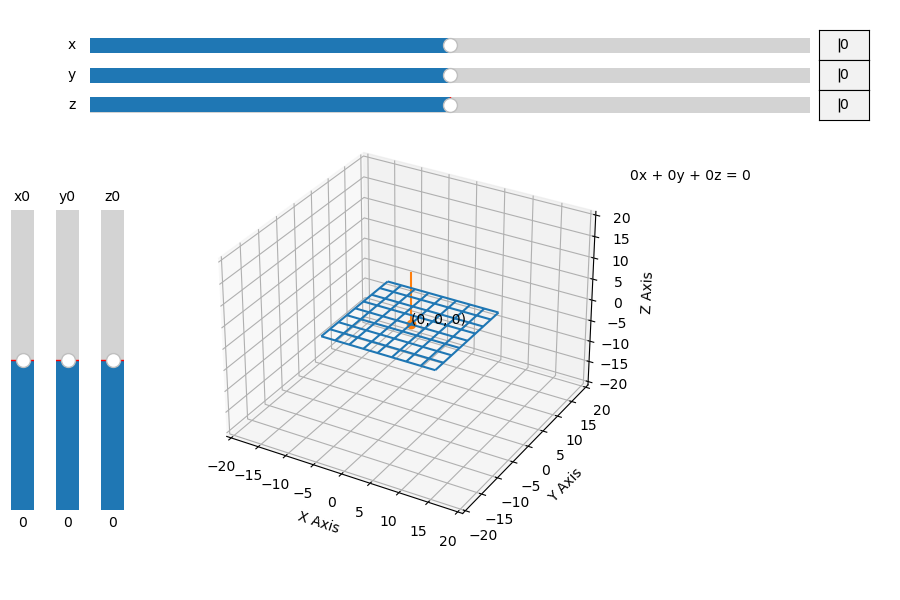

In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.widgets import TextBox

plt.close()
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_axes([0, 0.1, 0.9, 0.7], projection = '3d')
ax2 = fig.add_axes([0.1, 0.9, 0.8, 0.05])
ax3 = fig.add_axes([0.1, 0.85, 0.8, 0.05])
ax4 = fig.add_axes([0.1, 0.80, 0.8, 0.05])

ax5 = fig.add_axes([0.0, 0.15, 0.05, 0.5])
ax6 = fig.add_axes([0.05, 0.15, 0.05, 0.5])
ax7 = fig.add_axes([0.1, 0.15, 0.05, 0.5])
ax8 = fig.add_axes([0.7, 0.7, 0.1, 0.1])
# ax8 = fig.add_subplot()

t = np.linspace(0,12,10)
x = np.linspace(-10,10,9)
y = np.linspace(-10,10,9)
z = np.linspace(-10,10,9)

x, y = np.meshgrid(x,y)

n1 = 0
n2 = 0
n3 = 0

x0 = 0
y0 = 0
z0 = 0

if n3 == 0 and n1 != 0:
    y, z = np.meshgrid(y,z)
    
    x = x0 + (- n2*(y-y0) - n3*(z-z0)) / n1
    
elif n3 == 0 and n1 == 0 and n2 != 0:
    x, z = np.meshgrid(x,z)
    
    y = y0 + ( - n1*(x-x0) - n3*(z-z0)) / n2
    
elif n3 == 0 and n1 ==0 and n2 == 0:
    z = x * 0 + y * 0
    
else:
    z = z0 + (- n1*(x-x0) - n2*(y-y0)) / n3


n_mag = np.sqrt(n1**2 + n2**2 + n3**2)
if n_mag != 0:
    x_para = x0 + n1 / n_mag * t
    y_para = y0 + n2 / n_mag * t
    z_para = z0 + n3 / n_mag * t
else:
    x_para = x0 + np.linspace(0,0,10)
    y_para = y0 + np.linspace(0,0,10)
    z_para = z0 + t

ax1.plot(x0,y0,z0,'o',color='tab:orange')
ax1.text(x0,y0,z0, f'{x0,y0,z0}')

ax1.plot(x_para,y_para,z_para,color='tab:orange')
ax1.plot_wireframe(x,y,z, rstride=1, cstride=1)

ax1.set_xlim(-20, 20)
ax1.set_ylim(-20, 20)
ax1.set_zlim(-20, 20)

sx = Slider(ax = ax2, label = 'x', valmin = -10, valmax = 10, valinit = n1)
sy = Slider(ax = ax3, label = 'y', valmin = -10, valmax = 10, valinit = n2)
sz = Slider(ax = ax4, label = 'z', valmin = -10, valmax = 10, valinit = n3)

sx0 = Slider(ax = ax5, label = 'x0', valmin = -10, valmax = 10, valinit = x0, orientation="vertical")
sy0 = Slider(ax = ax6, label = 'y0', valmin = -10, valmax = 10, valinit = y0, orientation="vertical")
sz0 = Slider(ax = ax7, label = 'z0', valmin = -10, valmax = 10, valinit = z0, orientation="vertical")

axtx = fig.add_axes([0.91, 0.9, 0.055, 0.05])
axty = fig.add_axes([0.91, 0.85, 0.055, 0.05])
axtz = fig.add_axes([0.91, 0.8, 0.055, 0.05])

tx = TextBox(axtx, '', textalignment="center")
ty = TextBox(axty, '', textalignment="center")
tz = TextBox(axtz, '', textalignment="center")


def update(val):
    ax1.cla()
    ax8.cla()
    ax8.axis("off")
    
    x = np.linspace(-10,10,9)
    y = np.linspace(-10,10,9)
    z = np.linspace(-10,10,9)

    x, y = np.meshgrid(x,y)
    
    # n1 = tx.val
    # n2 = tx.val
    # n3 = tx.val
    
    # n1 = sx.val
    # n2 = sy.val
    # n3 = sz.val
    
    # x0 = sx0.val
    # y0 = sy0.val
    # z0 = sz0.val
    
    if n3 == 0 and n1 != 0:
        y, z = np.meshgrid(y,z)
    
        x = x0 + (- n2*(y-y0) - n3*(z-z0)) / n1
    
    elif n3 == 0 and n1 == 0 and n2 != 0:
        x, z = np.meshgrid(x,z)
    
        y = y0 + ( - n1*(x-x0) - n3*(z-z0)) / n2
    
    elif n3 == 0 and n1 ==0 and n2 == 0:
        z = x * 0 + y * 0 + z0
        
    else:
        z = z0 + (- n1*(x-x0) - n2*(y-y0)) / n3
    
    n_mag = np.sqrt(n1**2 + n2**2 + n3**2)
    if n_mag != 0:
        x_para = x0 + n1 / n_mag * t
        y_para = y0 + n2 / n_mag * t
        z_para = z0 + n3 / n_mag * t
    else:
        x_para = x0 + np.linspace(0,0,10)
        y_para = y0 + np.linspace(0,0,10)
        z_para = z0 + t

    ax1.plot(x0,y0,z0,'o',color='tab:orange')

    ax1.text(x0 + 0.5,y0 +0.5,z0 +0.5, f'{round(x0,2),round(y0,2),round(z0,2)}')

    ax1.plot(x_para,y_para,z_para,color='tab:orange')
    ax1.plot_wireframe(x,y,z, rstride=1, cstride=1)
    ax8.text(0, 0, f'{round(n1,2)}x + {round(n2,2)}y + {round(n3,2)}z = {round(n1*x0 + n2*y0 + n3*z0,2)}')
    ax1.set_xlim(-20, 20)
    ax1.set_ylim(-20, 20)
    ax1.set_zlim(-20, 20)
    ax1.set_xlabel("X Axis")
    ax1.set_ylabel("Y Axis")
    ax1.set_zlabel("Z Axis")

def slider(val):
    
    n1 = sx.val
    n2 = sy.val
    n3 = sz.val
    
    x0 = sx0.val
    y0 = sy0.val
    z0 = sz0.val
    
    tx.set_val(f'{round(n1,2)}')
    ty.set_val(f'{round(n2,2)}')
    tz.set_val(f'{round(n3,2)}')

def textx(val):
    
    if sx.val != eval(val):
        n1 = eval(val)
        sx.set_val(n1)
        update(val)

def texty(val):
    if sy.val != eval(val):
        n2 = eval(val)
        sy.set_val(n2)
    
def textz(val):
    if sz.val != eval(val):
        n3 = eval(val)
        sz.set_val(n3)
    
ax1.set_xlabel("X Axis")
ax1.set_ylabel("Y Axis")
ax1.set_zlabel("Z Axis")

sx.on_changed(slider)
sy.on_changed(slider)
sz.on_changed(slider)

sx0.on_changed(slider)
sy0.on_changed(slider)
sz0.on_changed(slider)

tx.set_val(f'{n1}')
ty.set_val(f'{n2}')
tz.set_val(f'{n3}')

tx.on_submit(textx)
ty.on_submit(texty)
tz.on_submit(textz)

ax8.axis("off")
ax8.text(0, 0, f'{n1}x + {n2}y + {n3}z = {n1*x0 + n2*y0 + n3*z0}')

plt.show()